# Fully Connected Net

For our least intelligent baseline, just *flatten* all of the layers and train a MLP classifier.

Since the DataLoader has multiple inputs, I think we need to use the module API. 


In [31]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import FCNet
from train import check_accuracy, train
from plottingFcts import trainingMetrics, sigBkgEff, plotROC

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
loader_train, loader_val, loader_test = getDataLoaders(batch_size=256)

In class, they said the network usually saturated with about 3 different hidden layers, so a default architecture I'm trying has hidden dimensions {150, 100, 50}, although these are hyperparams that I could (possibly) tune. I'm also using batchnorm and dropout!

In [21]:
myModel = FCNet()

In [22]:
for layer0, layer1, layer2, y in loader_train:
    scores = myModel(layer0, layer1, layer2)
    print(scores.shape)
    break

torch.Size([256, 3])


#### Sanity check
Before training, the validation accuracy should be about 33%

In [23]:
check_accuracy(loader_val, myModel)

Got 10430 / 30000 correct (34.77)


### Next step: Train the net!

For simplicity, just use the adam optimizer!


In [24]:
optimizer = optim.Adam(myModel.parameters())

In [25]:
np.log(3)

1.0986122886681098

In [26]:
train(loader_train, loader_val, myModel, optimizer)

Iteration 0, loss = 1.1228
Got 11720 / 30000 correct (39.07)

Got 70854 / 180000 correct (39.36)
Got 11829 / 30000 correct (39.43)
Got 77311 / 180000 correct (42.95)
Got 13023 / 30000 correct (43.41)
Got 83044 / 180000 correct (46.14)
Got 13932 / 30000 correct (46.44)
Got 87151 / 180000 correct (48.42)
Got 14668 / 30000 correct (48.89)
Got 91181 / 180000 correct (50.66)
Got 15090 / 30000 correct (50.30)
Got 94781 / 180000 correct (52.66)
Got 15577 / 30000 correct (51.92)
Got 97954 / 180000 correct (54.42)
Got 16327 / 30000 correct (54.42)
Got 100154 / 180000 correct (55.64)
Got 16694 / 30000 correct (55.65)
Got 102428 / 180000 correct (56.90)
Got 16880 / 30000 correct (56.27)
Got 103906 / 180000 correct (57.73)
Got 17342 / 30000 correct (57.81)
Got 105464 / 180000 correct (58.59)
Got 17516 / 30000 correct (58.39)
Got 106562 / 180000 correct (59.20)
Got 17732 / 30000 correct (59.11)
Got 107731 / 180000 correct (59.85)
Got 18020 / 30000 correct (60.07)
Got 108665 / 180000 correct (60.37)

Got 21506 / 30000 correct (71.69)
Got 128863 / 180000 correct (71.59)
Got 21465 / 30000 correct (71.55)
Got 128745 / 180000 correct (71.53)
Got 21537 / 30000 correct (71.79)
Got 128785 / 180000 correct (71.55)
Got 21560 / 30000 correct (71.87)
Got 128669 / 180000 correct (71.48)
Got 21457 / 30000 correct (71.52)
Got 128772 / 180000 correct (71.54)
Got 21399 / 30000 correct (71.33)
Got 128715 / 180000 correct (71.51)
Got 21485 / 30000 correct (71.62)
Got 128864 / 180000 correct (71.59)
Got 21481 / 30000 correct (71.60)
Got 128744 / 180000 correct (71.52)
Got 21442 / 30000 correct (71.47)
Got 128718 / 180000 correct (71.51)
Got 21407 / 30000 correct (71.36)
Got 128365 / 180000 correct (71.31)
Got 21478 / 30000 correct (71.59)
Got 128630 / 180000 correct (71.46)
Got 21416 / 30000 correct (71.39)
Got 128784 / 180000 correct (71.55)
Got 21426 / 30000 correct (71.42)
Got 128686 / 180000 correct (71.49)
Got 21425 / 30000 correct (71.42)
Got 128844 / 180000 correct (71.58)
Got 21490 / 30000 co

Got 130698 / 180000 correct (72.61)
Got 21737 / 30000 correct (72.46)
Got 130634 / 180000 correct (72.57)
Got 21700 / 30000 correct (72.33)
Got 130788 / 180000 correct (72.66)
Got 21781 / 30000 correct (72.60)
Got 130618 / 180000 correct (72.57)
Got 21743 / 30000 correct (72.48)
Got 130607 / 180000 correct (72.56)
Got 21768 / 30000 correct (72.56)
Got 130759 / 180000 correct (72.64)
Got 21803 / 30000 correct (72.68)
Got 130849 / 180000 correct (72.69)
Got 21799 / 30000 correct (72.66)
Got 130913 / 180000 correct (72.73)
Got 21808 / 30000 correct (72.69)
Got 130842 / 180000 correct (72.69)
Got 21846 / 30000 correct (72.82)
Got 130668 / 180000 correct (72.59)
Got 21738 / 30000 correct (72.46)
Got 130888 / 180000 correct (72.72)
Got 21752 / 30000 correct (72.51)
Got 130929 / 180000 correct (72.74)
Got 21801 / 30000 correct (72.67)
Got 130851 / 180000 correct (72.69)
Got 21828 / 30000 correct (72.76)
Got 130894 / 180000 correct (72.72)
Got 21774 / 30000 correct (72.58)
Got 130760 / 180000 

Got 21788 / 30000 correct (72.63)
Got 130550 / 180000 correct (72.53)
Got 21823 / 30000 correct (72.74)
Got 130948 / 180000 correct (72.75)
Got 21839 / 30000 correct (72.80)
Got 131043 / 180000 correct (72.80)
Got 21857 / 30000 correct (72.86)
Got 130970 / 180000 correct (72.76)
Got 21865 / 30000 correct (72.88)
Got 131075 / 180000 correct (72.82)
Got 21895 / 30000 correct (72.98)
Got 131060 / 180000 correct (72.81)
Got 21808 / 30000 correct (72.69)
Got 130852 / 180000 correct (72.70)
Got 21868 / 30000 correct (72.89)
Got 130922 / 180000 correct (72.73)
Got 21802 / 30000 correct (72.67)
Got 130977 / 180000 correct (72.77)
Got 21867 / 30000 correct (72.89)
Got 131024 / 180000 correct (72.79)
Got 21937 / 30000 correct (73.12)
Got 131227 / 180000 correct (72.90)
Got 21868 / 30000 correct (72.89)
Got 131242 / 180000 correct (72.91)
Got 21908 / 30000 correct (73.03)
Got 131501 / 180000 correct (73.06)
Got 21854 / 30000 correct (72.85)
Got 131098 / 180000 correct (72.83)
Got 21892 / 30000 co

Got 131780 / 180000 correct (73.21)
Got 21943 / 30000 correct (73.14)
Got 131982 / 180000 correct (73.32)
Got 22051 / 30000 correct (73.50)
Got 131755 / 180000 correct (73.20)
Got 22060 / 30000 correct (73.53)
Got 131869 / 180000 correct (73.26)
Got 21980 / 30000 correct (73.27)
Got 132015 / 180000 correct (73.34)
Got 21965 / 30000 correct (73.22)
Got 132031 / 180000 correct (73.35)
Got 21952 / 30000 correct (73.17)
Got 132115 / 180000 correct (73.40)
Got 22056 / 30000 correct (73.52)
Got 132008 / 180000 correct (73.34)
Got 21968 / 30000 correct (73.23)
Got 132103 / 180000 correct (73.39)
Got 22005 / 30000 correct (73.35)
Got 132304 / 180000 correct (73.50)
Got 22049 / 30000 correct (73.50)
Got 132149 / 180000 correct (73.42)
Got 22064 / 30000 correct (73.55)
Got 132331 / 180000 correct (73.52)
Got 22062 / 30000 correct (73.54)
Got 132278 / 180000 correct (73.49)
Got 22038 / 30000 correct (73.46)
Got 132289 / 180000 correct (73.49)
Got 22000 / 30000 correct (73.33)
Got 131895 / 180000 

Got 22049 / 30000 correct (73.50)
Got 132222 / 180000 correct (73.46)
Got 22048 / 30000 correct (73.49)
Got 132056 / 180000 correct (73.36)
Got 22031 / 30000 correct (73.44)
Got 131873 / 180000 correct (73.26)
Got 22018 / 30000 correct (73.39)
Got 131967 / 180000 correct (73.31)
Got 22013 / 30000 correct (73.38)
Got 132340 / 180000 correct (73.52)
Got 22020 / 30000 correct (73.40)
Got 132366 / 180000 correct (73.54)
Got 22063 / 30000 correct (73.54)
Got 132392 / 180000 correct (73.55)
Got 22070 / 30000 correct (73.57)
Got 132336 / 180000 correct (73.52)
Got 22079 / 30000 correct (73.60)
Got 132281 / 180000 correct (73.49)
Got 22020 / 30000 correct (73.40)
Got 132239 / 180000 correct (73.47)
Got 22028 / 30000 correct (73.43)
Got 132317 / 180000 correct (73.51)
Got 21972 / 30000 correct (73.24)
Got 132097 / 180000 correct (73.39)
Got 22044 / 30000 correct (73.48)
Got 132061 / 180000 correct (73.37)
Got 22028 / 30000 correct (73.43)
Got 132169 / 180000 correct (73.43)
Got 21972 / 30000 co

Got 132046 / 180000 correct (73.36)
Got 22011 / 30000 correct (73.37)
Got 131807 / 180000 correct (73.23)
Got 21985 / 30000 correct (73.28)
Iteration 700, loss = 0.5070
Got 21865 / 30000 correct (72.88)

Got 131705 / 180000 correct (73.17)
Got 21948 / 30000 correct (73.16)
Got 131797 / 180000 correct (73.22)
Got 21989 / 30000 correct (73.30)
Got 132034 / 180000 correct (73.35)
Got 21978 / 30000 correct (73.26)
Got 131447 / 180000 correct (73.03)
Got 21916 / 30000 correct (73.05)


## Plot the loss and accuracy curves

STILL NEED TO FILL THIS IN!
- The training was sort of prohibitively slow, so really need to figure out the GPU! But start with getting the rest of the pipeline figured out first!

## Discriminant plots / ROC Curves

Ok, so for the ROC curves, use the discriminant

$$D_\gamma = \frac{p_\gamma}{p_\pi + p_e}$$

Where $p_i$ corresponds to the output of the softmax node, and this discriminant separates a $\gamma$ signal from a $\pi$ and $e$ background, and we can define similar discriminants for $\pi^+$ or $e^+$ signal.

(30000,)
-29.82891 8.25282


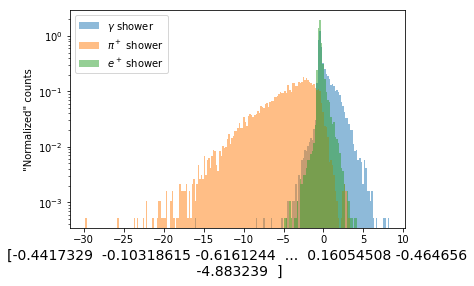

../plottingFcts.py:209: RuntimeWarning: divide by zero encountered in true_divide


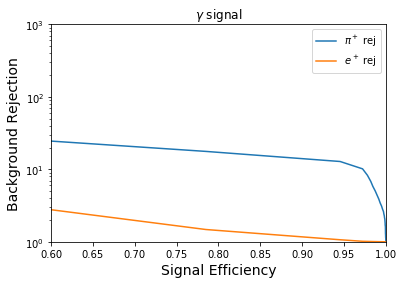

(30000,)
-10.043424 26.289589


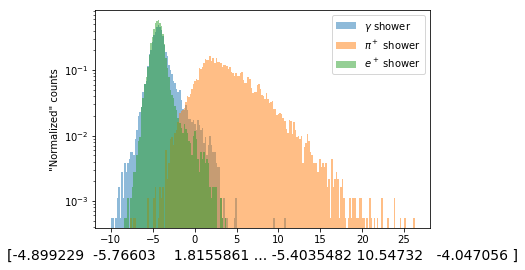

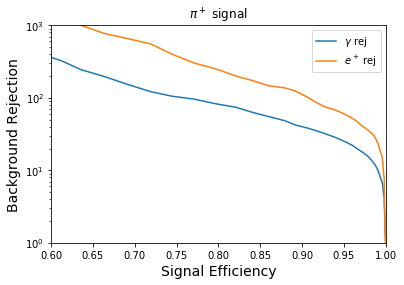

(30000,)
-33.11 1.1636398


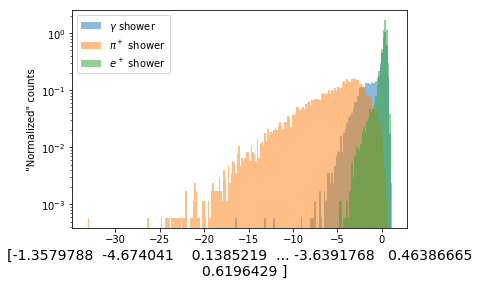

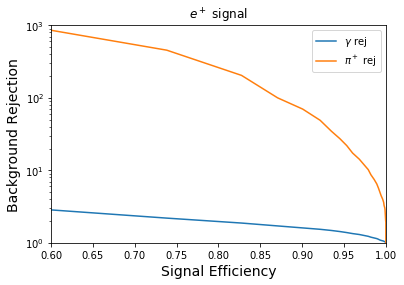

In [45]:
for node in range(3):
    g_eff, pi_eff, e_eff = sigBkgEff(myModel, loader_val, node)
    
    # Plot the ROC curve using node as the signal and the other two as the bkg
    if node == 0:
        plotROC([g_eff, g_eff], [pi_eff, e_eff], ['$\pi^+$ rej', '$e^+$ rej'], title='$\gamma$ signal')
    if node == 1:
        plotROC([pi_eff, pi_eff], [g_eff, e_eff], ['$\gamma$ rej', '$e^+$ rej'], title='$\pi^+$ signal')
    elif node == 2:
        plotROC([e_eff, e_eff], [g_eff, pi_eff], ['$\gamma$ rej', '$\pi^+$ rej'], title='$e^+$ signal')

**Notes:**

**Other interesting metrics**:
- Perhaps it would be interesting to look at the confusion matrix for these classes?